## Geometric Brownian motion (GBM) ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞ÄÎç∞Ïù¥ÌÑ∞

In [ ]:
# 1. asfreq('B') ‚Äî Îπà ÎÇ†Ïßú ÏÉùÏÑ±
# asfreq('B')Îäî "Business Day Frequency", Ï¶â ÏòÅÏóÖÏùº Îã®ÏúÑÎ°ú Î¶¨ÏÉòÌîåÎßÅ(resample) ÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.
# ÏõêÎûò Îç∞Ïù¥ÌÑ∞Í∞Ä ÌäπÏ†ï ÎÇ†Ïßú(Ïòà: Ï£ºÎßê Ï†úÏô∏)Îßå Ï°¥Ïû¨Ìï† Í≤ΩÏö∞, Ïù¥ Î™ÖÎ†πÏùÄ Î™®Îì† ÏòÅÏóÖÏùºÏùÑ Ìè¨Ìï®Ìïú ÏãúÍ≥ÑÏó¥Î°ú Î∞îÍøâÎãàÎã§.
# ÌïòÏßÄÎßå Í∏∞Ï°¥Ïóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎçò ÎÇ†ÏßúÎì§ÏùÄ NaNÏúºÎ°ú Ï±ÑÏõåÏßÄÍ≤å Îê©ÎãàÎã§.

In [ ]:
# 2. fillna(method='ffill') ‚Äî Í≤∞Ï∏°Í∞í Î≥¥Í∞Ñ (Ïïû Í∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞)
# fillna(method='ffill')Îäî Í≤∞Ï∏°Í∞í(NaN)ÏùÑ Î∞îÎ°ú ÏïûÏóê ÏûàÎäî Í∞íÏúºÎ°ú Ï±ÑÏõå ÎÑ£ÏäµÎãàÎã§.
# Ïù¥Î•º ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Ïùò Ïó∞ÏÜçÏÑ± Ïú†ÏßÄ Î∞è Î™®Îç∏ ÌïôÏäµ Ïãú Ïò§Î•ò Î∞©ÏßÄÍ∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§.

C:\Users\JYB\AppData\Local\Temp\ipykernel_2856\1828475742.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq('B').fillna(method='ffill') #  Í≤∞Ï∏°Í∞í ÏóÜÏù¥ Ïó∞ÏÜçÏ†ÅÏù∏ "ÏòÅÏóÖÏùº Îã®ÏúÑ" Îç∞Ïù¥ÌÑ∞


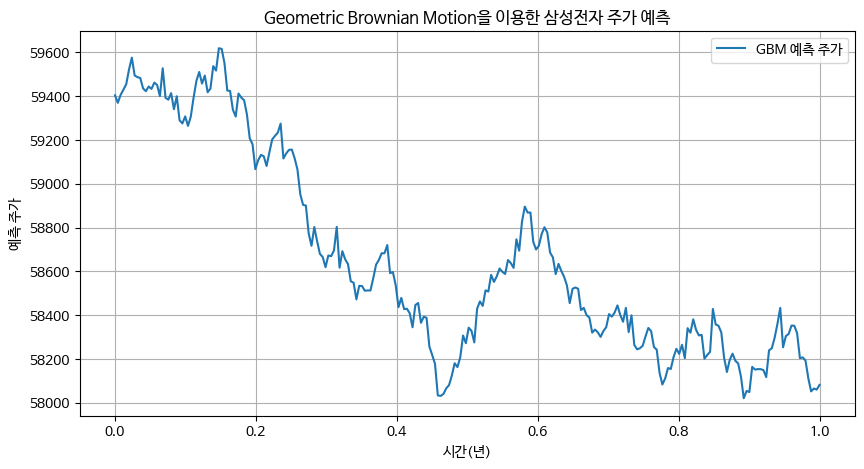

In [4]:
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞
df = stock.get_market_ohlcv_by_date("2020-01-01", "2025-06-20", "005930")
df = df[['Ï¢ÖÍ∞Ä']].copy()
df.index = pd.to_datetime(df.index)
df = df.asfreq('B').fillna(method='ffill') #  Í≤∞Ï∏°Í∞í ÏóÜÏù¥ Ïó∞ÏÜçÏ†ÅÏù∏ "ÏòÅÏóÖÏùº Îã®ÏúÑ" Îç∞Ïù¥ÌÑ∞

# Î°úÍ∑∏ÏàòÏùµÎ•† Î∞è GBM ÏãúÎÆ¨Î†àÏù¥ÏÖò
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1)) # shift(1)ÏùÄ ÌïòÎ£® Ï†Ñ Ï¢ÖÍ∞ÄÎ•º ÏùòÎØ∏ÌïòÎ©∞, np.log()Îäî ÏûêÏó∞Î°úÍ∑∏Î•º Í≥ÑÏÇ∞
mu, sigma = df['log_return'].mean(), df['log_return'].std() #mu: ÏùºÍ∞Ñ Î°úÍ∑∏ÏàòÏùµÎ•†Ïùò ÌèâÍ∑† ‚Üí ÏàòÏùµÏùò Í∏∞ÎåÄÍ∞í, sigma: ÏùºÍ∞Ñ Î°úÍ∑∏ÏàòÏùµÎ•†Ïùò ÌëúÏ§ÄÌé∏Ï∞® ‚Üí Î≥ÄÎèôÏÑ±(Volatility)

# T = 1: 1ÎÖÑ (Í∏∞Í∞Ñ) ÎèôÏïàÏùò ÏãúÎÆ¨Î†àÏù¥ÏÖò
# N = 252: ÏòÅÏóÖÏùº Í∏∞Ï§Ä Ïùº Ïàò (Ï£ºÏãù ÏãúÏû•Ïùò ÌèâÍ∑† Ïó∞Í∞Ñ Í±∞ÎûòÏùº)
# dt = 1/252: 1Ïùº Îã®ÏúÑÏùò ÏãúÍ∞Ñ Í∞ÑÍ≤©
# S0: ÌòÑÏû¨ ÏãúÏ†êÏùò Ï¢ÖÍ∞Ä (ÎßàÏßÄÎßâ Ï¢ÖÍ∞Ä)
# ÏãúÎÆ¨Î†àÏù¥ÏÖòÏùò ÏãúÏûë Ï£ºÍ∞ÄÎ°ú ÏÇ¨Ïö©

# ÏãúÍ∞Ñ Î≤°ÌÑ∞ ÏÉùÏÑ±
# t = np.linspace(0, T, N)
# t: 0Î∂ÄÌÑ∞ 1ÎÖÑÍπåÏßÄ Í∑†Îì± Í∞ÑÍ≤©Ïùò ÏãúÍ∞Ñ Î∞∞Ïó¥
# Í∏∏Ïù¥ N ‚Üí ÏãúÎÆ¨Î†àÏù¥ÏÖò Ï£ºÍ∞Ä ÏãúÍ≥ÑÏó¥Ïùò ÏãúÍ∞Ñ Ï∂ï

T, N, dt = 1, 252, 1/252
S0 = df['Ï¢ÖÍ∞Ä'].iloc[-1]
t = np.linspace(0, T, N)

# Î∏åÎùºÏö¥ Ïö¥Îèô Í≤ΩÎ°ú ÏÉùÏÑ±
# W = np.cumsum(np.random.standard_normal(N)) * np.sqrt(dt)
# W: Î∏åÎùºÏö¥ Ïö¥Îèô Í≤ΩÎ°ú (Wiener Process)
# ÎàÑÏ†Å ÌëúÏ§Ä Ï†ïÍ∑ú Î∂ÑÌè¨ Í∞íÏùÑ ‚àödtÎ°ú Ïä§ÏºÄÏùºÎßÅÌïòÏó¨ ÏÉùÏÑ±
# np.random.standard_normal(N): Í∏∏Ïù¥ NÏù∏ ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨ ÏÉòÌîå
#  GBM Î∞©Ï†ïÏãùÏúºÎ°ú Ï£ºÍ∞Ä ÏãúÎÆ¨Î†àÏù¥ÏÖò
# S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

W = np.cumsum(np.random.standard_normal(N)) * np.sqrt(dt)
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(t, S, label='GBM ÏòàÏ∏° Ï£ºÍ∞Ä')
plt.title('Geometric Brownian MotionÏùÑ Ïù¥Ïö©Ìïú ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä ÏòàÏ∏°')
plt.xlabel('ÏãúÍ∞Ñ(ÎÖÑ)')
plt.ylabel('ÏòàÏ∏° Ï£ºÍ∞Ä')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\JYB\AppData\Local\Temp\ipykernel_14856\3047524820.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq('B').fillna(method='ffill')  # ÌèâÏùº Í∏∞Ï§ÄÏúºÎ°ú Ïû¨Ï†ïÎ†¨ÌïòÍ≥† Í≤∞Ï∏°ÏπòÎäî ÏßÅÏ†Ñ Í∞íÏúºÎ°ú Ï±ÑÏõÄ


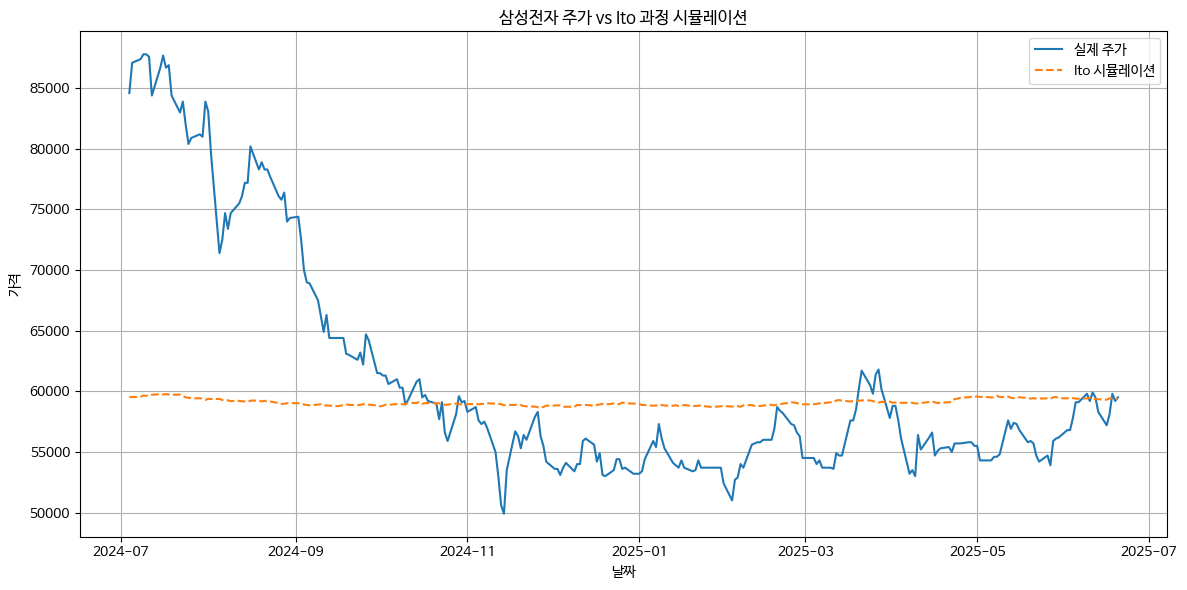

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
df = stock.get_market_ohlcv_by_date("2022-01-01", "2025-06-20", "005930")
df = df[['Ï¢ÖÍ∞Ä']].copy()
df = df.asfreq('B').fillna(method='ffill')  # ÌèâÏùº Í∏∞Ï§ÄÏúºÎ°ú Ïû¨Ï†ïÎ†¨ÌïòÍ≥† Í≤∞Ï∏°ÏπòÎäî ÏßÅÏ†Ñ Í∞íÏúºÎ°ú Ï±ÑÏõÄ

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# 3. Ito Í≥ºÏ†ï Îß§Í∞úÎ≥ÄÏàò Í≥ÑÏÇ∞
mu = df['log_return'].mean()
sigma = df['log_return'].std()
S0 = df['Ï¢ÖÍ∞Ä'].iloc[-1]  # ÌòÑÏû¨ Ï¢ÖÍ∞Ä Í∏∞Ï§Ä

# 4. Ito ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏÑ§Ï†ï
T = 1  # 1ÎÖÑ
N = 252  # 252 Í±∞ÎûòÏùº
dt = T / N
t = np.linspace(0, T, N)
np.random.seed(42)  # Ïû¨ÌòÑÏÑ± ÌôïÎ≥¥
W = np.cumsum(np.random.standard_normal(N)) * np.sqrt(dt)

# 5. Ito Í≥ºÏ†ïÏóê Îî∞Î•∏ Ï£ºÍ∞Ä ÏãúÎÆ¨Î†àÏù¥ÏÖò (Geometric Brownian Motion)
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# 6. Ïã§Ï†ú Ï¢ÖÍ∞ÄÏôÄ ÎπÑÍµê ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(df.index[-N:], df['Ï¢ÖÍ∞Ä'].iloc[-N:], label='Ïã§Ï†ú Ï£ºÍ∞Ä')
plt.plot(df.index[-N:], S, label='Ito ÏãúÎÆ¨Î†àÏù¥ÏÖò', linestyle='--')
plt.title("ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä vs Ito Í≥ºÏ†ï ÏãúÎÆ¨Î†àÏù¥ÏÖò")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Í∞ÄÍ≤©")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Ito Ï£ºÍ∞Ä Í≤ΩÎ°ú

C:\Users\JYB\AppData\Local\Temp\ipykernel_14856\4019856569.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq('B').fillna(method='ffill')


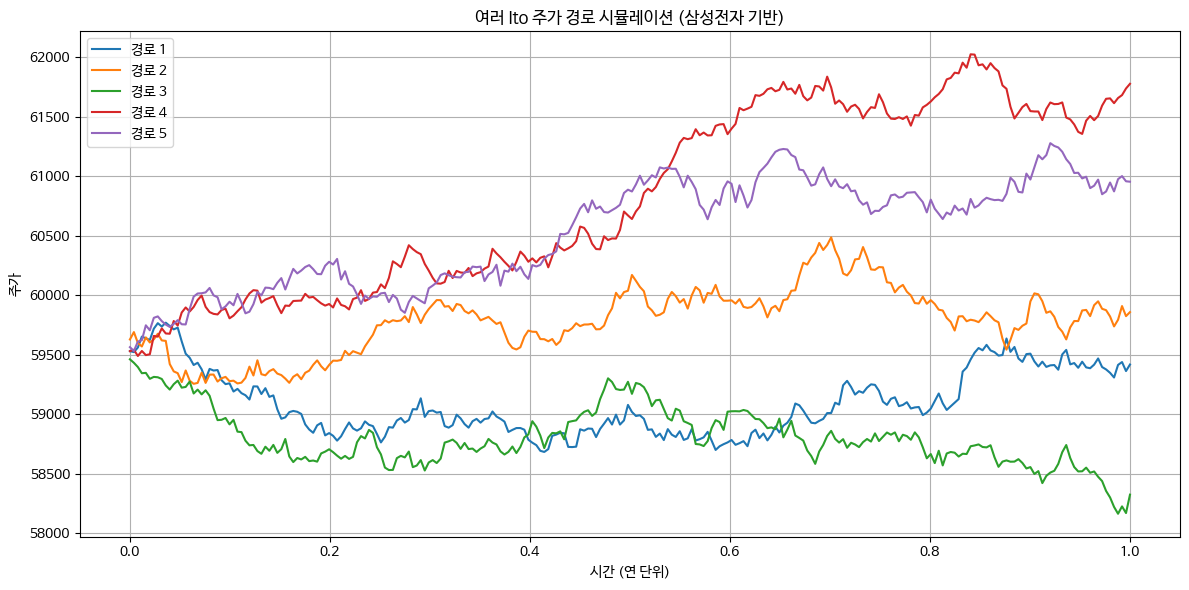

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
df = stock.get_market_ohlcv_by_date("2022-01-01", "2025-06-20", "005930")[['Ï¢ÖÍ∞Ä']].copy()
df = df.asfreq('B').fillna(method='ffill')

# Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# Ito ÌååÎùºÎØ∏ÌÑ∞ Ï∂îÏ†ï
mu = df['log_return'].mean()
sigma = df['log_return'].std()
S0 = df['Ï¢ÖÍ∞Ä'].iloc[-1]
T, N = 1, 252
dt = T / N
t = np.linspace(0, T, N)

# ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏàòÌñâ
np.random.seed(42)
simulations = []
for _ in range(5):
    W = np.cumsum(np.random.standard_normal(N)) * np.sqrt(dt)
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    simulations.append(S)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
for i, sim in enumerate(simulations):
    plt.plot(t, sim, label=f'Í≤ΩÎ°ú {i+1}')
plt.title('Ïó¨Îü¨ Ito Ï£ºÍ∞Ä Í≤ΩÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò (ÏÇºÏÑ±Ï†ÑÏûê Í∏∞Î∞ò)')
plt.xlabel('ÏãúÍ∞Ñ (Ïó∞ Îã®ÏúÑ)')
plt.ylabel('Ï£ºÍ∞Ä')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
ÏÇºÏÑ±Ï†ÑÏûê + Wiener Í≥ºÏ†ï ÎπÑÍµê

C:\Users\JYB\AppData\Local\Temp\ipykernel_14856\242174455.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq('B').fillna(method='ffill')  # ÏòÅÏóÖÏùº Í∏∞Ï§Ä ÎπàÏπ∏ Î≥¥Í∞Ñ


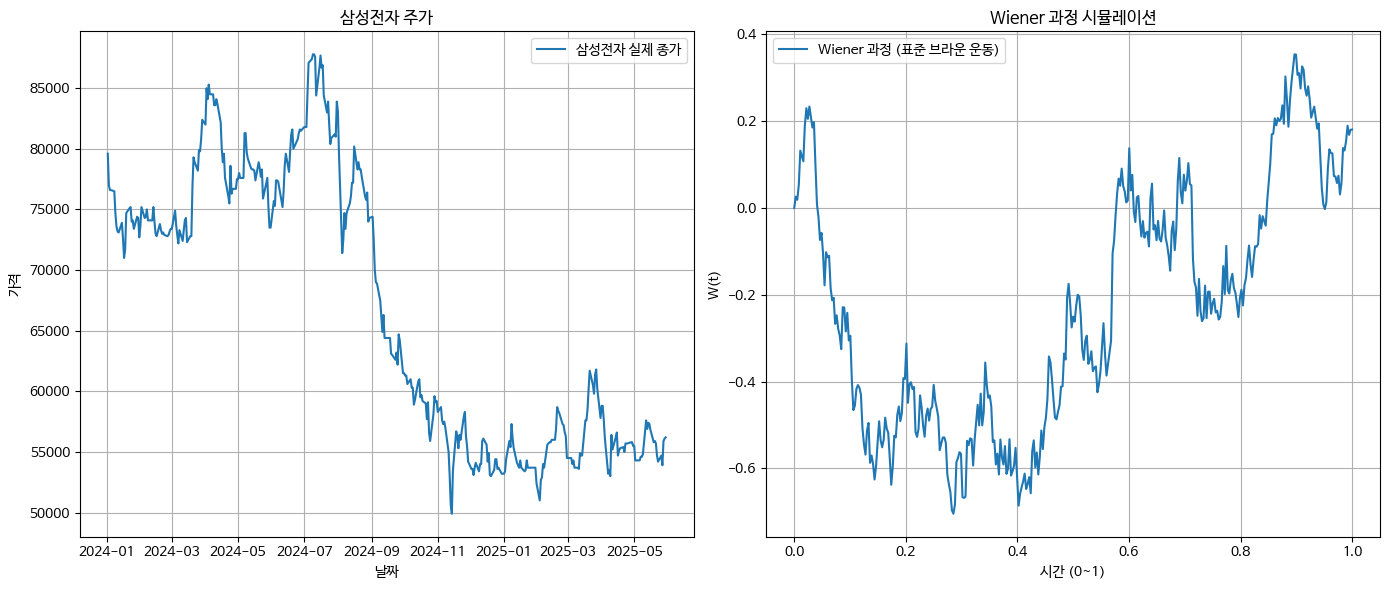

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
df = stock.get_market_ohlcv_by_date("2024-01-01", "2025-05-31", "005930")[['Ï¢ÖÍ∞Ä']]
df = df.asfreq('B').fillna(method='ffill')  # ÏòÅÏóÖÏùº Í∏∞Ï§Ä ÎπàÏπ∏ Î≥¥Í∞Ñ
prices = df['Ï¢ÖÍ∞Ä'].values
N = len(prices)
t = np.linspace(0, 1, N)

# 2. Wiener Í≥ºÏ†ï ÏãúÎÆ¨Î†àÏù¥ÏÖò
# ÌëúÏ§Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÎÇúÏàòÎ•º N-1Í∞ú ÏÉùÏÑ±Ìï©ÎãàÎã§.
# np.cumsum(...)ÎÇúÏàòÎì§Ïùò ÎàÑÏ†ÅÌï©ÏùÑ Íµ¨Ìï©ÎãàÎã§.
# ÎàÑÏ†ÅÌï©ÏùÄ ÏãúÏ†ê ùë°ÍπåÏßÄÏùò Wiener Í≤ΩÎ°ú ùëä(ùë°) Î•º Íµ¨ÏÑ±Ìï©ÎãàÎã§.
# Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏùòÎØ∏ÌïòÎäî Í≤É: Wiener Í≥ºÏ†ïÏùÄ ÎàÑÏ†ÅÎêú Ï†ïÍ∑úÎ∂ÑÌè¨ ÎÇúÏàòÎì§Ïùò Ìï©ÏúºÎ°ú Íµ¨ÏÑ±Îê©ÎãàÎã§.
np.random.seed(42)
W = np.zeros(N)
W[1:] = np.cumsum(np.random.normal(0, np.sqrt(1/N), N-1))

# 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(df.index, prices, label='ÏÇºÏÑ±Ï†ÑÏûê Ïã§Ï†ú Ï¢ÖÍ∞Ä')
plt.title("ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Í∞ÄÍ≤©")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, W, label='Wiener Í≥ºÏ†ï (ÌëúÏ§Ä Î∏åÎùºÏö¥ Ïö¥Îèô)')
plt.title("Wiener Í≥ºÏ†ï ÏãúÎÆ¨Î†àÏù¥ÏÖò")
plt.xlabel("ÏãúÍ∞Ñ (0~1)")
plt.ylabel("W(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# ÏôºÏ™ΩÍ∑∏ÎûòÌîÑ : ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä: Ïã§Ï†úÎ°ú Í¥ÄÏ∏°Îêú ÎπÑÏ†ïÏÉÅÏ†ÅÏù¥Í≥† Î≥µÌï©Ï†ÅÏù∏ ÏãúÍ≥ÑÏó¥.
# Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ : Wiener Í≥ºÏ†ï: ÏàúÏàò ÌôïÎ•†Ï†Å ÏõÄÏßÅÏûÑÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Ïù¥ÏÉÅÏ†Å ÏàòÌïô Î™®Îç∏.
# Îëê Í∑∏ÎûòÌîÑÎ•º ÎÇòÎûÄÌûà Î≥¥Î©¥, ÌòÑÏã§Ïùò Ï£ºÍ∞ÄÎèÑ ÏùºÏ†ï Î∂ÄÎ∂Ñ ÌôïÎ•†Ï†Å Í≤ΩÌñ• (ÎûúÎç§ÏõåÌÅ¨) ÏùÑ Îî∞Î•¥ÏßÄÎßå, Ïã§Ï†úÎäî Ï∂îÏÑ∏(trend) ÎÇò Í≥ÑÏ†àÏÑ±(seasonality) ÎèÑ Ï°¥Ïû¨Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏóêÏÑú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

# Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ: Wiener Í≥ºÏ†ï (ÌëúÏ§Ä Î∏åÎùºÏö¥ Ïö¥Îèô)
# Í∑∏ÎûòÌîÑ Íµ¨ÏÑ±
# XÏ∂ï: ÏãúÍ∞Ñ (0 ~ 1, Ïó∞ Îã®ÏúÑÎ°ú Ï†ïÍ∑úÌôîÎê®)
# YÏ∂ï: ÌëúÏ§Ä Î∏åÎùºÏö¥ Ïö¥Îèô 
# ùëä(ùë°) Í∞í
# Ìï¥ÏÑù
# Ïù¥ Í≥°ÏÑ†ÏùÄ Î¨¥ÏûëÏúÑÏ†ÅÏù∏ ÎàÑÏ†Å Î≥ÄÌôî Í≤ΩÎ°úÎ•º ÏãúÎÆ¨Î†àÏù¥ÏÖòÌïú Í≤ÉÏûÖÎãàÎã§.
# Í∞Å Í≤ΩÎ°úÎäî ÏãúÍ∞ÑÏóê Îî∞Îùº Ïò§Î•¥ÎÇ¥Î¶¨Îäî ÏàúÏàòÌïú ÎûúÎç§ÏõåÌÅ¨Î•º Îî∞Î•¥Î©∞,
# ÌèâÍ∑† Î≥ÄÌôîÍ∞Ä 0Ïù¥Í≥†,Î≥ÄÌôîÏùò ÌÅ¨Í∏∞(Î∂ÑÏÇ∞)Îäî ÏãúÍ∞ÑÏóê ÎπÑÎ°ÄÌïòÏó¨ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
# ÌòÑÏã§ Ï£ºÍ∞ÄÏùò ÏõÄÏßÅÏûÑÏù¥ ÎûúÎç§ÏõåÌÅ¨ Í∞ÄÏÑ§ (random walk hypothesis) Î•º Îî∞Î•º Ïàò ÏûàÎã§Îäî Ï†êÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï£ºÎäî Îç∞ Ïú†Ïö©Ìï©ÎãàÎã§.